<a href="https://colab.research.google.com/github/rebeccahe1998/E4511-2021-HE/blob/main/Curate_Merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

---




In [ ]:
%tensorflow_version 1.x

# get the Anaconda file 
! wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
! chmod +x Anaconda3-2019.10-Linux-x86_64.sh
! bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local

! time conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import deepchem as dc

# install mordred, bravado and molvs
! time conda install -c conda-forge -y mordred bravado molvs

# get the Install AMPL_GPU_test.sh
!wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh

# run the script to install AMPL
! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

In [2]:
# FutureWarnings and DeprecationWarnings are present from some of the AMPL 
# dependency modules.
import warnings
warnings.filterwarnings('ignore')

import json
# import numpy as np
# import pandas as pd
import os
import requests

In [3]:
# Import AMPL libraries
# 
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd
# Additional python libraries
import pandas as pd
import numpy as np
import getpass,os

In [4]:
from matplotlib_venn import venn2
import getpass, os
import pandas as pd
import matplotlib.pyplot as plt
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.chem_diversity as cd

# Curate

---



In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
path = '/content/drive/MyDrive/'

In [41]:
chembl = pd.read_csv(path+'CHEMBL_curated.csv', header=0, index_col=0)
dtc = pd.read_csv(path+'DTC_Curated.csv',header=0, index_col=0)


In [11]:
! wget https://raw.githubusercontent.com/rebeccahe1998/E4511-2021-HE/main/EXCAPE_SLC6A3_SMILES_DROPNA

--2021-03-25 13:55:43--  https://raw.githubusercontent.com/rebeccahe1998/E4511-2021-HE/main/EXCAPE_SLC6A3_SMILES_DROPNA
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1010196 (987K) [text/plain]
Saving to: ‘EXCAPE_SLC6A3_SMILES_DROPNA’

EXCAPE_SLC6A3_SMILE 100%[===================>] 986.52K  --.-KB/s    in 0.07s   

2021-03-25 13:55:43 (14.7 MB/s) - ‘EXCAPE_SLC6A3_SMILES_DROPNA’ saved [1010196/1010196]



In [39]:
excape = pd.read_csv('EXCAPE_SLC6A3_SMILES_DROPNA' ,header = 0, index_col=0)

excape.rename( columns={"pXC50" : "PXC50"}, inplace = True)


In [50]:
excape.rename( columns={"Original_Entry_ID" : "compound_id","Activity_Flag" : "active"}, inplace = True)

In [55]:
excape_ = excape.loc[:,['compound_id','base_rdkit_smiles','PXC50','active']]

In [69]:
excape_.active = excape_.active.map({'A':1, 'N':0})


In [70]:
excape_

,compound_id,base_rdkit_smiles,PXC50,active
230,CHEMBL3298875,CCC(NC)C(=O)c1ccccc1,6.39000,1
236,CHEMBL1289,Clc1cc(Cl)c(OCC#CI)cc1Cl,5.81000,1
369,CHEMBL2030635,c1ccc(CCN2CCCC2)cc1,5.56000,1
377,11571886,NCC1CCC(c2ccccc2)O1,6.83268,1
416,458519,CCNC(C)C(=O)c1ccccc1,5.99396,1
...,...,...,...,...
111808,CHEMBL3143431,CC[C@H](C)[C@H](NC(=O)[C@@H](NC[C@H](CC(C)C)NC...,8.10000,1
111810,CHEMBL411570,C[C@@H](O)[C@H](NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O...,3.74000,0
111811,CHEMBL1200633,CC[C@H](C)[C@H]1O[C@]2(CC[C@@H]1C)C[C@@H]1C[C@...,5.45000,1
111812,CHEMBL383931,C[C@H](NC(=O)[C@@H](N)Cc1ccc(-c2ccc(C[C@H](N)C...,3.76000,0


In [59]:
chembl.drop('relation',axis=1,inplace=True)
chembl

,compound_id,base_rdkit_smiles,PXC50,active
0,CHEMBL290510,COC(=O)[C@H](c1ccccc1)[C@@H]1CCCCO1,4.89,0
1,CHEMBL4068156,[O-][S+](Cc1cccs1)C(c1ccc(F)cc1)c1ccc(F)cc1,5.40,0
2,CHEMBL2407331,COCC(c1ccc(F)c(Cl)c1)C1CCNCC1,6.24,1
3,CHEMBL511288,Cc1ccc(-c2c(C)noc2[C@@H]2C3CCC(C[C@@H]2c2ccc(C...,6.76,1
4,CHEMBL3673174,Fc1ccc(C23CCN(CC2)Cc2cc(-c4ccc(C(F)(F)F)nn4)cc...,6.92,1
...,...,...,...,...
1626,CHEMBL1643664,Cc1cc([C@@H]2C3CCC(C[C@@H]2c2ccc(Cl)cc2)S3)on1,8.14,1
1627,CHEMBL4224951,CCOC[C@H]1[C@@H](c2ccc(Cl)c(Cl)c2)C[C@@H]2CC[C...,8.10,1
1628,CHEMBL3331484,Clc1ccc(CN(C2CC2)C2CNC2)cc1Cl,6.58,1
1629,CHEMBL3673146,Clc1ccc(C23CCN(CC2)Cc2cc(-c4cnc5ccccc5n4)ccc23...,6.45,1


In [60]:
dtc.drop('relation',axis=1,inplace=True)

In [74]:
dtc.rename( columns={"pXC50" : "PXC50"}, inplace = True)
dtc

,compound_id,base_rdkit_smiles,PXC50,active
0,CHEMBL599233,CC(C(=O)c1cccc([N+](=O)[O-])c1)N1CCCCC1,5.000000,0
1,CHEMBL2047573,OC(CCN1CCC(O)(Cc2ccccc2)CC1)c1ccc(Cl)c(Cl)c1,6.248721,1
2,CHEMBL1083410,CNC[C@H](O)CCN1c2ccccc2N(c2ccccc2F)S1(=O)=O,5.618163,0
3,CHEMBL3673162,COc1ccc(-c2ccc3c(c2)CN2CCC3(c3ccc(Cl)c(Cl)c3)C...,8.229148,1
4,CHEMBL2096860,COC(=O)[C@H]1C2CCC(C[C@@H]1c1ccc(I)cc1)N2C,7.643974,1
...,...,...,...,...
1401,CHEMBL566001,CC(NC(C)(C)C)C(=O)c1ccc(Br)cc1,6.024756,1
1402,CHEMBL247538,COc1cccc(CN(C2CCOCC2)[C@H]2CCNC2)c1C,6.014125,1
1403,CHEMBL2171415,CCCOC(c1ccc(Cl)c(Cl)c1)C1CNC1,7.494850,1
1404,CHEMBL119385,O=c1ncn2nc(Sc3ccc(F)cc3F)ccc2c1-c1c(Cl)cccc1Cl,5.091622,0


In [75]:
dtc_v =dtc['base_rdkit_smiles'].tolist()
chembl_v =chembl['base_rdkit_smiles'].tolist()
excape_v = excape_['base_rdkit_smiles'].tolist()
from matplotlib_venn import venn3

Text(0.5, 1.0, 'SLC6A3')

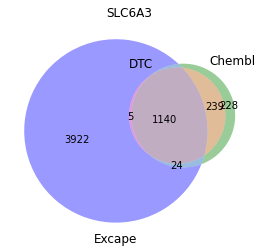

In [76]:
dlst = [set(dtc_v),set(chembl_v), set(excape_v)]

fig = plt.figure()
venn3(dlst, ('DTC', 'Chembl','Excape'))
plt.title('SLC6A3')

In [77]:
comb_df =  pd.concat([dtc,chembl,excape_])
comb_df

,compound_id,base_rdkit_smiles,PXC50,active
0,CHEMBL599233,CC(C(=O)c1cccc([N+](=O)[O-])c1)N1CCCCC1,5.000000,0
1,CHEMBL2047573,OC(CCN1CCC(O)(Cc2ccccc2)CC1)c1ccc(Cl)c(Cl)c1,6.248721,1
2,CHEMBL1083410,CNC[C@H](O)CCN1c2ccccc2N(c2ccccc2F)S1(=O)=O,5.618163,0
3,CHEMBL3673162,COc1ccc(-c2ccc3c(c2)CN2CCC3(c3ccc(Cl)c(Cl)c3)C...,8.229148,1
4,CHEMBL2096860,COC(=O)[C@H]1C2CCC(C[C@@H]1c1ccc(I)cc1)N2C,7.643974,1
...,...,...,...,...
111808,CHEMBL3143431,CC[C@H](C)[C@H](NC(=O)[C@@H](NC[C@H](CC(C)C)NC...,8.100000,1
111810,CHEMBL411570,C[C@@H](O)[C@H](NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O...,3.740000,0
111811,CHEMBL1200633,CC[C@H](C)[C@H]1O[C@]2(CC[C@@H]1C)C[C@@H]1C[C@...,5.450000,1
111812,CHEMBL383931,C[C@H](NC(=O)[C@@H](N)Cc1ccc(-c2ccc(C[C@H](N)C...,3.760000,0


In [78]:
column = 'PXC50'

# tolerance: Percentage of individual respsonse values allowed to different 
# from the average to be included in averaging
tolerance = 10

# list_bad_duplicates: Print structures with bad duplicates
list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
max_std = 1

# compound_id: Compound ID column
compound_id = 'compound_id'

# smiles_col: SMILES column
smiles_col = 'base_rdkit_smiles'

curated_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       comb_df, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)

Bad duplicates removed from dataset
Dataframe size (8281, 8)
List of 'bad' duplicates removed
        compound_id      PXC50  VALUE_NUM_mean   Perc_Var  VALUE_NUM_std
5349           2771   5.032920        6.117640  17.731020       2.101633
3780           3386   5.721250        5.953495   3.900992       1.227600
3257       44418862   8.853870        7.530487  17.573670       1.146084
4079       CHEMBL11   4.590000        5.170352  11.224613       1.236139
4078       CHEMBL11   4.700000        5.170352   9.097098       1.236139
989        CHEMBL11   4.591760        5.170352  11.190572       1.236139
4077       CHEMBL11   7.380000        5.170352  42.736897       1.236139
1880       CHEMBL11   4.590000        5.170352  11.224613       1.236139
132   CHEMBL1201082   4.982227        5.953495  16.314256       1.227600
2180  CHEMBL1201082   4.984000        5.953495  16.284474       1.227600
3781  CHEMBL1201082   6.110000        5.953495   2.628785       1.227600
7815   CHEMBL137718   9.350000

Post-processing dataset

Total Number of results = 5565
dataset mean = 6.703010039911565 NM
dataset stdev = 1.2005630288468463 NM
dataset max = 11.698970004336019 NM
dataset min = 2.14 NM



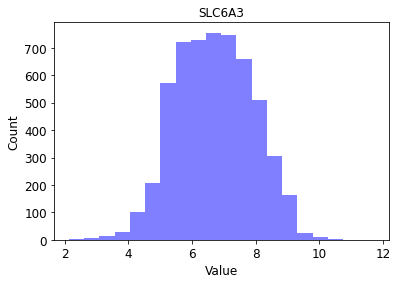

In [79]:
column = 'PXC50'

# # of 'bins' for the histogram
num_bins = 20

title = 'SLC6A3'

units = 'NM'

filepath = ""

data=curated_df

curate_data.summarize_data(column, num_bins, title, units, filepath, data)

In [89]:
curated_df.to_csv('drive/MyDrive/curated_combined_df.csv')

In [81]:
feat_type='ECFP'
dist_metric='tanimoto'
union_s = curated_df['base_rdkit_smiles'].tolist()

smiles_dtc = dtc['base_rdkit_smiles'].tolist()
smiles_chembl = chembl['base_rdkit_smiles'].tolist()

## Have the dataset with more compounds be the point of reference

if len(smiles_dtc) > len(smiles_chembl) :
    s1,s2=smiles_dtc,smiles_chembl
else:
    s1,s2=smiles_chembl,smiles_dtc
calc_type='nearest'
num_nearest = 5
dist_sample=cd.calc_dist_smiles(feat_type, dist_metric, s1, s2, calc_type)

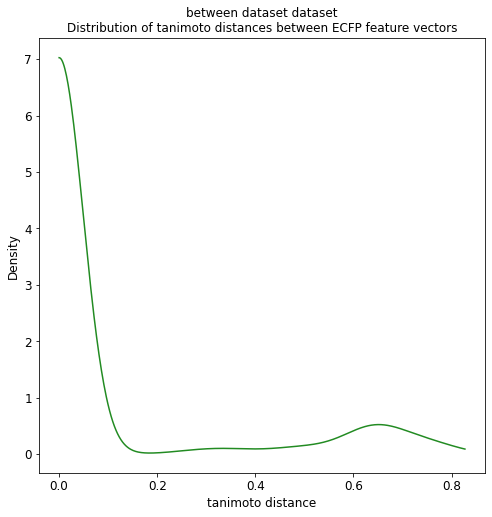

In [82]:
from scipy.stats.kde import gaussian_kde

import numpy as np
import matplotlib.pyplot as plt

odir='./'
task_name='between dataset'
dist_pdf = gaussian_kde(dist_sample)
x_plt = np.linspace(min(dist_sample), max(dist_sample), 500)
y_plt = dist_pdf(x_plt)    
fig, ax = plt.subplots(figsize=(8.0,8.0))
ax.plot(x_plt, y_plt, color='forestgreen')
ax.set_xlabel('%s distance' % dist_metric)
ax.set_ylabel('Density')
ax.set_title("%s dataset\nDistribution of %s distances between %s feature vectors" % (
              task_name, dist_metric, feat_type))
fig.savefig(odir+'distance_to_background_mol.png')

In [83]:
feat_type='ECFP'
dist_metric='tanimoto'
union_s = curated_df['base_rdkit_smiles'].tolist()

smiles_dtc = dtc['base_rdkit_smiles'].tolist()
smiles_excape = excape_['base_rdkit_smiles'].tolist()

## Have the dataset with more compounds be the point of reference

if len(smiles_dtc) > len(smiles_excape) :
    s1,s2=smiles_dtc,smiles_excape
else:
    s1,s2=smiles_excape,smiles_dtc
calc_type='nearest'
num_nearest = 5
dist_sample=cd.calc_dist_smiles(feat_type, dist_metric, s1, s2, calc_type)

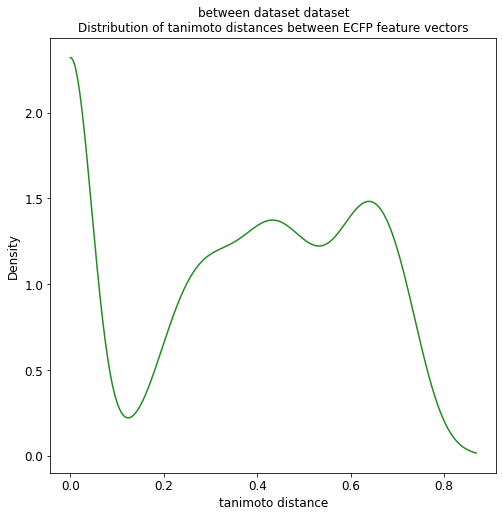

In [84]:
from scipy.stats.kde import gaussian_kde

import numpy as np
import matplotlib.pyplot as plt

odir='./'
task_name='between dataset'
dist_pdf = gaussian_kde(dist_sample)
x_plt = np.linspace(min(dist_sample), max(dist_sample), 500)
y_plt = dist_pdf(x_plt)    
fig, ax = plt.subplots(figsize=(8.0,8.0))
ax.plot(x_plt, y_plt, color='forestgreen')
ax.set_xlabel('%s distance' % dist_metric)
ax.set_ylabel('Density')
ax.set_title("%s dataset\nDistribution of %s distances between %s feature vectors" % (
              task_name, dist_metric, feat_type))
fig.savefig(odir+'distance_to_background_mol.png')